# Machine Learning Predictive Revenue Model: Apprentice Chef, Inc

>**Course:** Machine Learning <br> **Author:** Georgina Canela Ferre<br>

>**Date:** 7th of March 2020 <br>


## Company Summary:
Apprentice Chef's is a company located in Silicon Valley, California.<br> The company aims to deliver meal sets with an average of cooking preparation of 30'<br> What customers like about Apprentice Chef? <br> 1. High quality of the aliments. <br> 2. Reduction of time dedicated to cook.

Key information:
**90%** of the revenue from Apprentice Chef comes from customers with **12 months or less ordering meal sets**

## Goal of the case: 

In this analysis I aim to address the following question:<br>
**How much revenue each customer will generate during their first year of orders?**
<br> The target variable of the analysis will be the **revenue.**  

## Hypothesis:
In this section I state what are the possible hypothesis that may affect the revenue and may would help the prediction of the revenue:

**H1 : Revenue has a positive correlation to average clicks per visit.**

**H2 : Total photos viewed and master class attended indicates the engagement of the customers.**

**H3 : Average time per site visit is a key driver of the revenue.**

To state abovementioned hypothesis I have been researching about the key metrics a food delivery company should track. 

Link: https://www.searchenginejournal.com/ecommerce-metrics/323811/ <br>
Link2: https://www.quora.com/What-are-the-typical-BizOps-metrics-KPIs-that-food-delivery-companies-like-UberEats-or-DoorDash-track
***

# Packages to use for EDA, Outliers Identification and ML model 

To start the analysis, I am going to import all required packages. 
See below comments.

In [1]:
####################
#Importing packages#
####################

import pandas                  as pd                     # data science essentials
import seaborn                 as sns                    # enhanced graphical output
import matplotlib.pyplot       as plt                    # essential graphical output
import numpy                   as np                     # to make mathematical calculations
from matplotlib.ticker         import FormatStrFormatter # to customize x-axis

### ML packages
# Estimators
import statsmodels.formula.api as smf                    # linear regression (statsmodels)
from  sklearn.model_selection import train_test_split    # train/test split
from sklearn.linear_model     import LinearRegression    # linear regression (scikit-learn)
import sklearn.linear_model                              # linear model
from sklearn.ensemble         import GradientBoostingRegressor

#Preprocessing
from sklearn.preprocessing import RobustScaler

#Saving the original excel file 
file = 'Apprentice_Chef_Dataset.xlsx'

#Read the excel file
original_df = pd.read_excel(file)

# Exploratory Data Analysis (EDA)

In this section I am going to explore the data given from the data science team at Apprentice Chef. The data already has been queried, sampled and verified.
***

First of all, I want to explore the type of variables I am going to work on. That's why, in the following section I am importing the Apprentice Chef Data Dictionary because I want to have clearly stated the description of each variable and avoid any misconception.

Furthermore, to know the data type of each feature gives an overview of the characteristics of each one: continuous, discrete, categorical or binomial. Knowing the type of variable is a really powerful tool to start to understand the dataset that I am going to explore. 

In [2]:
# Summary of column names and dictionary #
# Name and Description
apprentice_description = pd.read_excel('Apprentice_Chef_Data_Dictionary.xlsx')
apprentice_description

,Column,Data Type,Description
0,REVENUE,float,Total revenue generated over the first year of...
1,CROSS_SELL_SUCCESS,integer,Success of promoting Halfway There (1 = SUCCES...
2,NAME,string,Full name of customer (collected upon initial ...
3,EMAIL,string,Email of customer (collected upon initial regi...
4,FIRST_NAME,string,First name of customer (collected upon initial...
5,FAMILY_NAME,string,Last name of customer (collected upon initial ...
6,TOTAL_MEALS_ORDERED,integer,Total count of meals ordered per customer account
7,UNIQUE_MEALS_PURCH,integer,Count of unique meal sets ordered per customer...
8,CONTACTS_W_CUSTOMER_SERVICE,integer,Count of times a customer made contact with cu...
9,PRODUCT_CATEGORIES_VIEWED,integer,Total number of meal categories viewed (online...


In [3]:
print(original_df.shape)
print(original_df.columns)

(1946, 29)
Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME',
       'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
       'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
       'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
       'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS',
       'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
       'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT',
       'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED',
       'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'],
      dtype='object')


The shape of the dataset is **1946 rows and 29 columns** <br>
I also wanted to print the name of the columns to have them as a list in case I need it in future steps.

In [4]:
# descriptive statistics
original_df.iloc[:, 1: ].describe().round(2)

,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,...,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,...,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,...,2.97,0.36,0.11,35.41,150.56,4.44,0.60,2.79,13.51,106.43
std,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,...,2.74,0.48,0.32,26.58,49.45,1.55,0.64,0.76,2.33,181.01
min,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,33.40,0.00,0.00,1.00,5.00,0.00
25%,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,...,1.00,0.00,0.00,10.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,...,2.00,0.00,0.00,30.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,...,4.00,1.00,0.00,60.00,173.78,5.00,1.00,3.00,15.00,174.00
max,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,...,19.00,1.00,1.00,90.00,564.20,11.00,3.00,5.00,19.00,1600.00


In the descriptive statistics table I excluded the variable revenue from the table because is our target variable. 
The variables that only takes values from 0 to 1 are the **binomial variables**
Also, I can spot variables with not normal distribution. Looking the max value if the value is far from the 75 percentile and the difference between the 50 and 75 percentile is not huge, it may indicate that the distribution is not normal.

The variables with not normal distributions are:
- TOTAL_MEALS_ORDERED
- UNIQUE_MEALS_PUNCH 
- CONTACTS_W_CUSTOMER_SERVICE
- AVG_TIME_PER_SITE_VISIT
- CANCELLATIONS_BEFORE_NOON 
- WEEKLY_PLAN 
- EARLY_DELIVERIES 
- LATE_DELIVERIES 
- AVG_PREP_VID_TIME 
- LARGEST_ORDER_SIZE 
- TOTAL_PHOTOS_VIEWED

***

## Missing Values 

Here, I am going to review if there are any missing values in the dataset before deep diving in the outliers section.

In [5]:
# Print Info to check data type
print(original_df.info())

# Print number of null value
print("\nNumber of Null Data: ")
print(original_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   REVENUE                       1946 non-null   float64
 1   CROSS_SELL_SUCCESS            1946 non-null   int64  
 2   NAME                          1946 non-null   object 
 3   EMAIL                         1946 non-null   object 
 4   FIRST_NAME                    1946 non-null   object 
 5   FAMILY_NAME                   1899 non-null   object 
 6   TOTAL_MEALS_ORDERED           1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH            1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE   1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED     1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT       1946 non-null   float64
 11  MOBILE_NUMBER                 1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON     1946 non-null   int64  
 13  CAN

As we can see in the list, I can identify **47 missing values** in the variable FAMILY_NAME. 
Next step will be to replace those missing values with the word 'Unknown'

Below, I am running a for loop in order to create a new column to accumulate the missing values from the column FAMILY_NAME in a new variable.

In [6]:
# Missing values new column
for col in original_df:

    # creating columns with 1s if missing and 0 if not
    if original_df[col].isnull().astype(int).sum() > 0:
        original_df['m_'+col] = original_df[col].isnull().astype(int)


# 5 first row of the data frame with the missing values column
original_df.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,m_FAMILY_NAME
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,...,1,0,90,165.8,6,1,3,11,0,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,...,1,0,90,150.5,4,1,3,13,90,0
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,...,0,0,80,99.6,3,0,3,12,0,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,...,0,0,90,125.0,3,0,3,13,0,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,...,1,0,90,135.3,3,1,3,13,253,0


As mentioned before, here I am replacing the missing values with the world **'Unknown'**

In [7]:
#Fill the missing values from column Family Name
fill = 'Unknown'

# imputing 'Mas Vnr Area'
original_df['FAMILY_NAME'] = original_df['FAMILY_NAME'].fillna(fill)

In [8]:
#Double-Check if there are any other missing values:
# Print number of null value
print("\nNumber of Null Data: ")
print(original_df.isnull().sum())


Number of Null Data: 
REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                     0
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
FOLLOWED_RECOMMENDATIONS_PCT    0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED      

To sum up, the data frame has a total of **1946 observations and 29 features (variables)**. 

We can identify variables that are continuous, discrete, categorical or binomial.  

The column FAMILY_NAME presented **47 missing values** which have been replaced with the word **'Unknown'**.

***

# Flag Outliers and trends

I will not use **Gender Guesser** because the names from our data frame are not common. To use Gender Guesser could lead to bad predictions. Nevertheless, it would have been useful to explore the gender distribution if names were more common.

In the next section, I am plotting all the variables excluding the categorical variables, revenue and m_family_name in order to see the distribution of each variable and the presence of any outliers.  

/Users/gcanela94/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


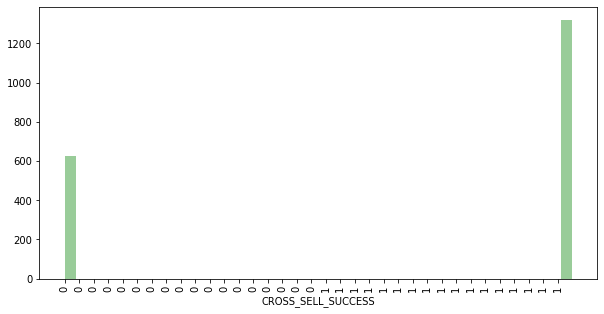

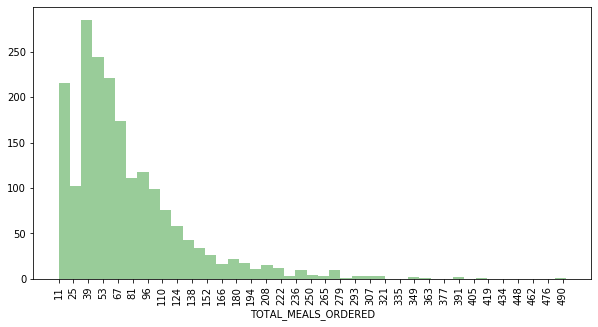

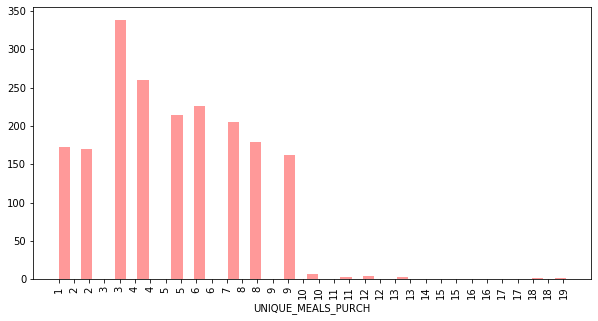

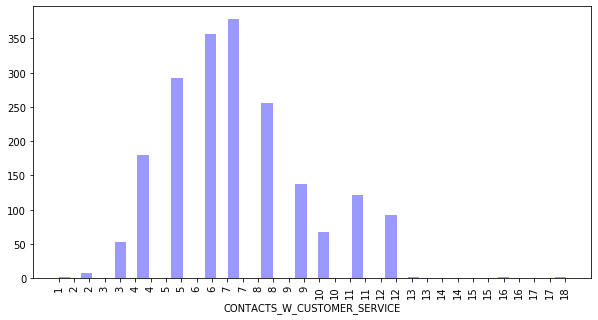

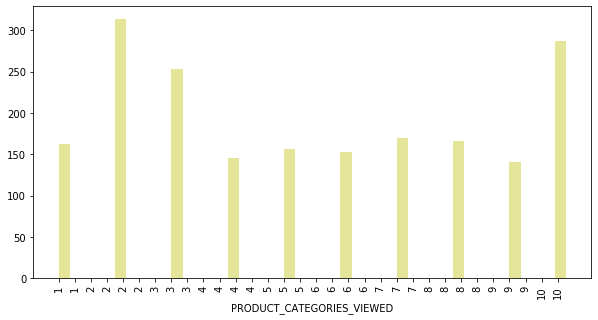

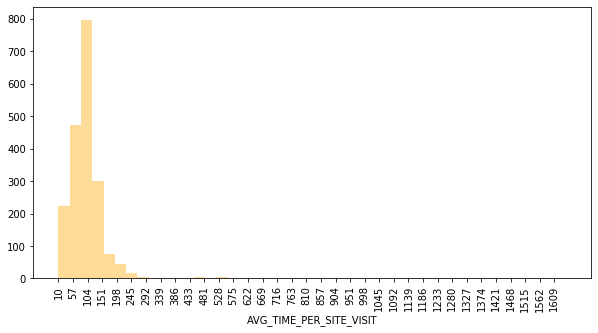

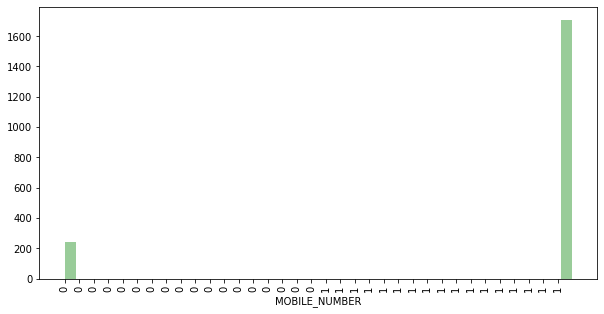

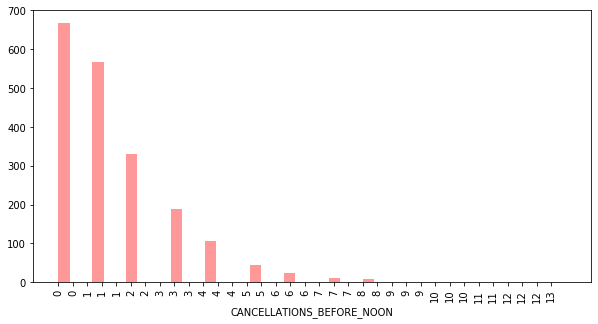

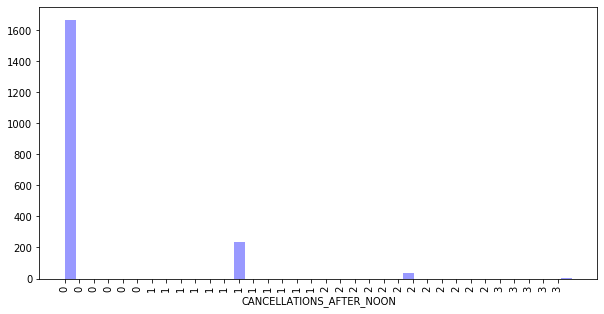

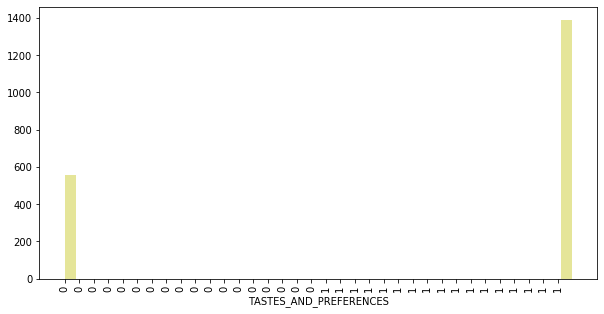

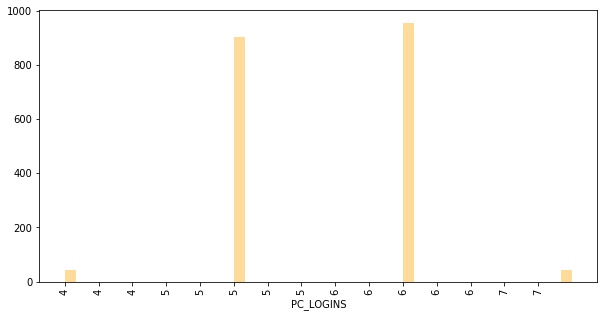

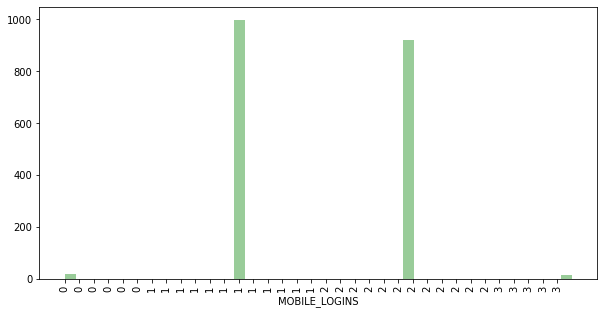

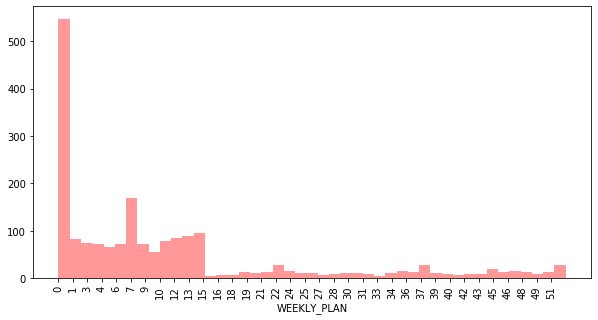

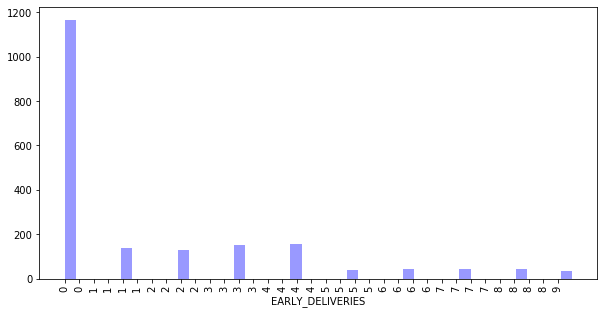

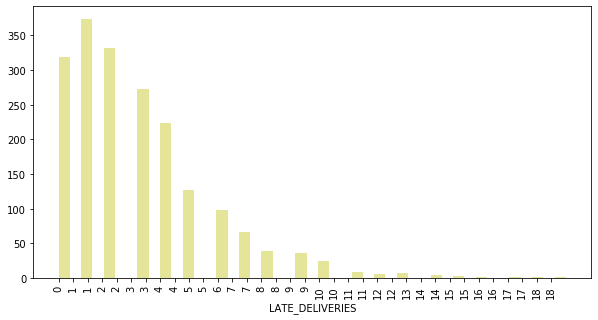

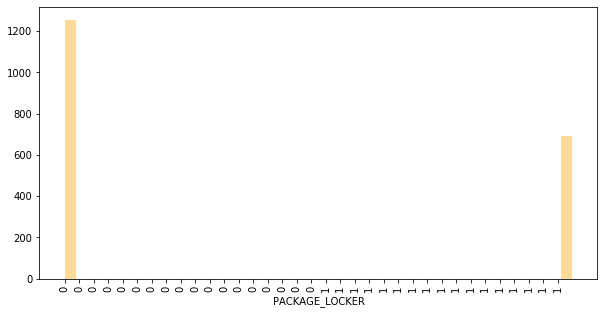

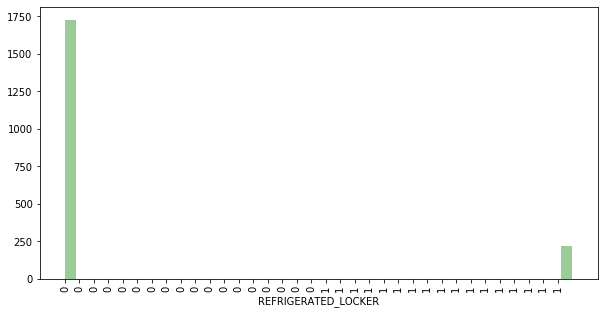

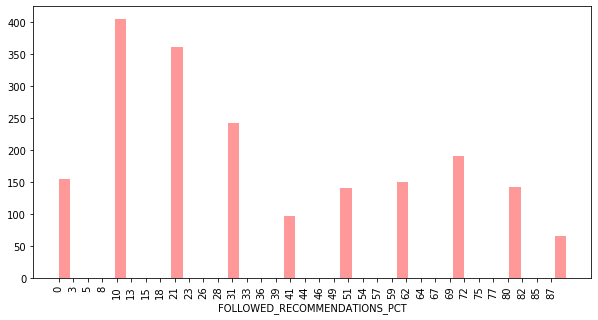

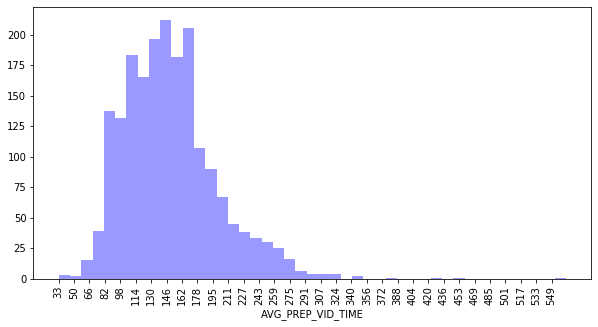

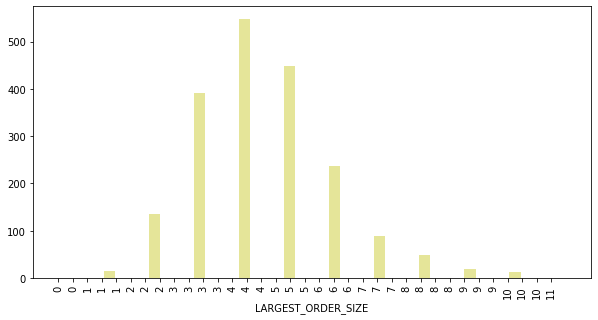

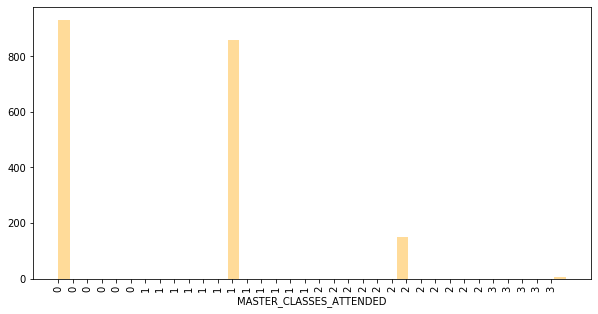

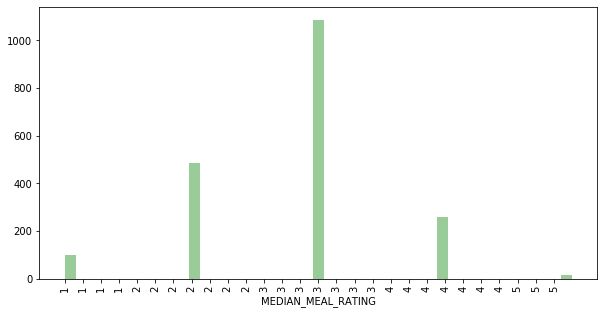

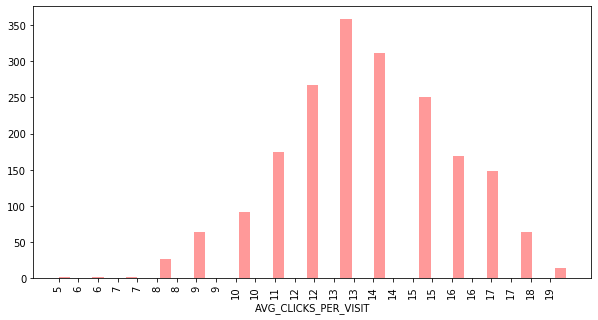

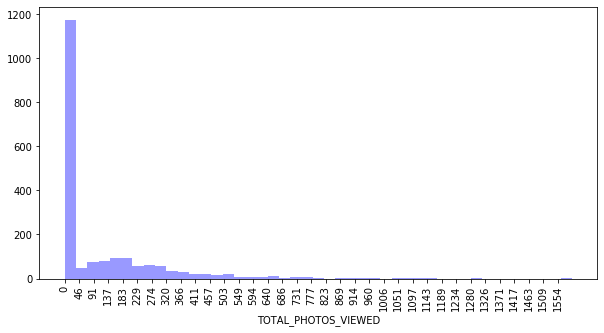

In [9]:
#Create a copy of original_df
df = original_df.copy()

# Dropping REVENUE
x_out = df.drop(['REVENUE', 'm_FAMILY_NAME'], axis = 1)

#For loop in order to plot the distribution of each variable
colors = ['g', 'r', 'b', 'y', 'orange']
colors = colors * len(x_out.columns)
sub_p = [1,2,3,4]
sup_p = sub_p * len(x_out.columns)

for i, col in enumerate(x_out.columns):
    if type(x_out[col][0]) == str:
        continue
    else:
        fig, ax = plt.subplots(figsize = (10, 5))
        sns.distplot(x_out[col],
                    kde   = False,
                    bins  = 'sqrt',
                    color = colors[i])
# making customized ticks and relative to the range of each feature
    ax.xaxis.set_ticks(np.arange( 
        min(df[x_out.columns][col]),
        max(df[x_out.columns][col]),
        max(df[x_out.columns][col])/35))
#using the FormatStrFormatter function from matplotlib
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.f'))
#rotating the ticks axis to make it easy to plot several numbers simultaneously
    plt.xticks(rotation=90)
    
plt.show()

The plot of the distribution of each variable helped me a lot to determine the threshold for the outliers and trends. I identified many threshold but didn't help to improve the revenue prediction of my model so I didn't use them at the final ML model. Also, I used a code to spread the numbers on the y_axis and have a clear view of the outliers. 
Link: https://stackoverflow.com/questions/11264521/date-ticks-and-rotation-in-matplotlib

Below the unique indicator that helped the Gradient Buster model to improve: 

In [10]:
#########################
# Threshold for outliers#
#########################

#Meal 4
med_meal_rat_4 = 4
original_df['med_meal_rat_4'] = 0
condition = original_df.loc[0:,'med_meal_rat_4'][med_meal_rat_4 == original_df['MEDIAN_MEAL_RATING']]
original_df['med_meal_rat_4'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)


***

The next section shows how I tried to add more outliers but those were not relevant for the model, so I decided to comment them even I created them for improving the ML revenue model.

In [11]:
# #Meals Order
# total_meals_ord_lo  = 50
# total_meals_ord_hi = 280

# #Product Categories
# product_categories_viewed_lo = 3
# product_categories_viewed_mid = 7
# product_categories_viewed_hi = 10

# #Average Time
# avg_time_per_site_visit_lo = 60
# avg_time_per_site_visit_mid = 140
# avg_time_per_site_visit_hi = 620

# #Weekly Plan
# weekly_plan_lo = 15
# weekly_plan_mid = 33
# weekly_plan_hi = 60

# #Followed Recommendation
# followed_recommendations_lo = 23
# followed_recommendations_hi = 90

# #Av_Prep_vid_time
# av_prep_vid_time_lo = 98
# av_prep_vid_time_mid = 162
# av_prep_vid_time_hi = 330

# #Photo Viewed
# photos_viewed_lo = 90
# photos_viewed_hi = 500

# #Med_Meal
# med_meal_rat_1 = 1
# med_meal_rat_2 = 2
# med_meal_rat_3 = 3
# med_meal_rat_5 = 5

# #WEEKLY_PLAN
# out_weekly_plan = 15

# original_df["out_weekly_plan"] = 0
# condition = original_df.loc[0:,'out_weekly_plan'][original_df['WEEKLY_PLAN'] > out_weekly_plan]
# original_df['out_weekly_plan'].replace(to_replace = condition,
#                               value      = 1,
#                               inplace    = True)

# #TOTAL_MEALS_ORDERED
# out_total_meals_ordered = 335

# original_df['out_total_meals_ordered'] = 0
# condition = original_df.loc[0:,'out_total_meals_ordered'][original_df['TOTAL_MEALS_ORDERED'] > out_total_meals_ordered]
# original_df['out_total_meals_ordered'].replace(to_replace = condition,
#                                value      = 1,
#                                inplace    = True)

# #Unique Meal Purch (maybe)
# out_UNIQUE_MEALS_PURCH = 10
# original_df['out_UNIQUE_MEALS_PURCH'] = 0
# condition = original_df.loc[0:,'out_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] > out_UNIQUE_MEALS_PURCH]
# original_df['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition,
#                                value      = 1,
#                                inplace    = True)

# #Contacts w customer service
# out_CONTACTS_W_CUSTOMER_SERVICE = 12 
# original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
# condition = original_df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > out_CONTACTS_W_CUSTOMER_SERVICE]
# original_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition,
#                                value      = 1,
#                                inplace    = True)

# #Av Prep Video Time
# out_AVG_PREP_VID_TIME = 325
# original_df['out_AVG_PREP_VID_TIME'] = 0
# condition = original_df.loc[0:,'out_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > out_AVG_PREP_VID_TIME]
# original_df['out_AVG_PREP_VID_TIME'].replace(to_replace = condition,
#                                value      = 1,
#                                inplace    = True)


# Correlation with the Revenue

In this section I want to identify which variables matter the most and are highly correlated to revenue. 
Then, knowing this information I will create new features to improve the model. 

In [12]:
##############################
#Ordinary Least Squares (OLS)# 
##############################

def print_OLS_comment():
    print ("""I considered to use the Ordinary Least Squares (OLS) but our variables do not meet the basic OLS assumptions: 

- The linear regression model is “linear in parameters"

- There is a random sampling of observations

- The conditional mean should be zero

- There is no multi-collinearity (or perfect collinearity)

- Spherical errors: There is homoscedasticity and no autocorrelation

- Optional Assumption: Error terms should be normally distributed

Only few variables meet these requirements in our model and wouldn't be effective to run these analysis only
for few variables because I would be missing important information from the other ones. 
Information from: https://www.albert.io/blog/key-assumptions-of-ols-econometrics-review/ """)
    
print_OLS_comment()

I considered to use the Ordinary Least Squares (OLS) but our variables do not meet the basic OLS assumptions: 

- The linear regression model is “linear in parameters"

- There is a random sampling of observations

- The conditional mean should be zero

- There is no multi-collinearity (or perfect collinearity)

- Spherical errors: There is homoscedasticity and no autocorrelation

- Optional Assumption: Error terms should be normally distributed

Only few variables meet these requirements in our model and wouldn't be effective to run these analysis only
for few variables because I would be missing important information from the other ones. 
Information from: https://www.albert.io/blog/key-assumptions-of-ols-econometrics-review/ 


In [13]:
# creating a (Pearson) correlation matrix
df_corr = original_df.corr().round(2)

# printing (Pearson) correlations with SalePrice
print(df_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                         1.00
AVG_PREP_VID_TIME               0.64
MEDIAN_MEAL_RATING              0.61
TOTAL_MEALS_ORDERED             0.60
med_meal_rat_4                  0.59
TOTAL_PHOTOS_VIEWED             0.47
MASTER_CLASSES_ATTENDED         0.45
LARGEST_ORDER_SIZE              0.44
AVG_TIME_PER_SITE_VISIT         0.14
CONTACTS_W_CUSTOMER_SERVICE     0.10
PRODUCT_CATEGORIES_VIEWED       0.03
MOBILE_NUMBER                   0.03
PC_LOGINS                       0.02
CANCELLATIONS_BEFORE_NOON       0.01
TASTES_AND_PREFERENCES          0.01
WEEKLY_PLAN                     0.01
EARLY_DELIVERIES               -0.00
REFRIGERATED_LOCKER            -0.00
CROSS_SELL_SUCCESS              0.00
m_FAMILY_NAME                  -0.01
LATE_DELIVERIES                -0.01
PACKAGE_LOCKER                 -0.01
MOBILE_LOGINS                  -0.02
FOLLOWED_RECOMMENDATIONS_PCT   -0.02
CANCELLATIONS_AFTER_NOON       -0.04
UNIQUE_MEALS_PURCH             -0.06
AVG_CLICKS_PER_VISIT           -0.55
N

Below are the variables with highest correlation with the revenue: 

AVG_PREP_VID_TIME                     0.64
MEDIAN_MEAL_RATING                    0.61
TOTAL_MEALS_ORDERED                   0.60
TOTAL_PHOTOS_VIEWED                   0.47
MASTER_CLASSES_ATTENDED               0.45
LARGEST_ORDER_SIZE                    0.44

This information will be really valid to create new features for the model.

Also, notice Average Clicks Per Visit are negatively correlated with revenue. It makes sense, since usually only platforms pay $ per click. I noticed that the customers with higher clicks are the ones that produce less revenue. 

# Featuring Variables

In this section I created 3 new variables that are adding value to the model.

The first one is **final orders** which I considered to be really valuable to create since the cancellations before noon are fully reimbursed. It means that the total meals ordered are counting the cancellations before noon. Since I have the information about the total cancellations before noon and this is related to the revenue to create a new column with the final orders will help on the prediction.  

The second one is **meals options** which I considered to also be really valuable for the model since this new feature will tell how diversified are our customers in terms of meals orders.

Last but not least is **total orders customer service** which I also considered to be really valuable for the model since it will indicate the frequency of clients contacting the customer service compared with the total meals ordered. 

Below the formulas:

In [14]:
#Final Orders
original_df['final_orders'] = original_df['TOTAL_MEALS_ORDERED'] - original_df['CANCELLATIONS_BEFORE_NOON']

#Meals Options
original_df['meals_options'] = original_df['UNIQUE_MEALS_PURCH']/original_df['TOTAL_MEALS_ORDERED']

#Total Orders Contact Cust Services
original_df['total_orders_custserv'] = original_df['CONTACTS_W_CUSTOMER_SERVICE'] /  original_df['TOTAL_MEALS_ORDERED']


***
I tried to use other features such as total unique orders, total orders without cancellations, meal options, total logins, total logs, ratio customer engagement, speed web and sales. Nevertheless, those features were not relevant for the model. 

In [15]:
#df['total_unique_orders'] =  df.UNIQUE_MEALS_PURCH / df.TOTAL_MEALS_ORDERED 
#df['total_orders_without_cancellations'] = df.TOTAL_MEALS_ORDERED - (df.CANCELLATIONS_BEFORE_NOON + df.CANCELLATIONS_AFTER_NOON)
#df['meal_options'] = df[UNIQUE_MEALS_PURCH] / df.TOTAL_MEALS_ORDERED
#df['total_logins'] = df['PC_LOGINS'] + df['MOBILE_LOGINS']
#df['total_logs'] = df['PC_LOGINS'] + df['MOBILE_LOGINS']
#df['ratio_cust_eng'] = df['AVG_PREP_VID_TIME']/ df['AVG_TIME_PER_SITE_VISIT']
#df['speed_web'] = df['AVG_TIME_PER_SITE_VISIT']/df['PRODUCT_CATEGORIES_VIEWED']
#df['sales'] = df['TOTAL_PHOTOS_VIEWED']/ df['TOTAL_MEALS_ORDERED']
#original_df['total_orders_without_cancellations'] = original_df['TOTAL_MEALS_ORDERED'] - (original_df['CANCELLATIONS_BEFORE_NOON'] + original_df['CANCELLATIONS_AFTER_NOON'])


# Prediction Model ML

After creating new features and cleaning the data set I am going to use the variables to predict the revenue.
I tried the model with the variable revenue and the variable log revenue. The model estimates better with the log revenue so I decided to use it.

In [16]:
original_df['LOG_REVENUE'] = np.log(original_df['REVENUE'])

The seed is 222<br>
Test size is 0.25

In [17]:
df_scaled = original_df.copy()
df_scaled = df_scaled.drop(['NAME', 'EMAIL', 'FIRST_NAME','FAMILY_NAME'], axis = 1)

#Scaling
scaler = RobustScaler().fit(df_scaled)
scaler.transform(df_scaled)

y = df_scaled.copy()

X =['TOTAL_MEALS_ORDERED',            
    'UNIQUE_MEALS_PURCH',           
    'CONTACTS_W_CUSTOMER_SERVICE',   
    'AVG_TIME_PER_SITE_VISIT',    
    'AVG_PREP_VID_TIME',           
    'LARGEST_ORDER_SIZE',           
    'MASTER_CLASSES_ATTENDED',         
    'MEDIAN_MEAL_RATING',            
    'TOTAL_PHOTOS_VIEWED',
    'meals_options',
    'med_meal_rat_4',
    'final_orders',
    'total_orders_custserv'
]

#Target Variable 
independent_data = df_scaled[X]
y = df_scaled.loc[:, 'LOG_REVENUE']

# running train/test split again
X_train, X_test, y_train, y_test = train_test_split(independent_data,
                                                    y,
                                                    test_size    = 0.25,
                                                    random_state = 222)

In [18]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)


# SCORING the results

print('Training Score:', lr.score(X_train, y_train).round(2)) 
print('Testing Score:',  lr.score(X_test, y_test).round(2))


lr_train_score = lr.score(X_train, y_train).round(2)
lr_test_score  = lr.score(X_test, y_test).round(2)

Training Score: 0.75
Testing Score: 0.68


In [19]:
# Ridge Model
ridge_model = sklearn.linear_model.Ridge()

# FITTING the training data
ridge_fit  = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_fit.predict(X_test)

print('Training Score:', ridge_model.score(X_train, y_train).round(4))
print('Testing Score:',  ridge_model.score(X_test, y_test).round(4))


# saving scoring data for future use
#save it as an object
#look the coeficients and will weight them for us
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ridge_model.score(X_test, y_test).round(4)

Training Score: 0.7453
Testing Score: 0.6832


In [20]:
#Lasso model
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso()

# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_test)

print('Training Score:', lasso_model.score(X_train, y_train).round(4))
print('Testing Score:',  lasso_model.score(X_test, y_test).round(4))


# saving scoring data for future use
# lasso: optimization algorithm Looking to coef and seeing which variables are significant
# shrink the coeficcient to make the variables less valuable in that model
#variables of interest for us
lasso_train_score = lasso_model.score(X_train, y_train).round(4)
lasso_test_score  = lasso_model.score(X_test, y_test).round(4)

Training Score: 0.5513
Testing Score: 0.5211


I tried to used the Linear Regression, the Lasso and the Ridge but the score is not high enough.

# Final Predictive Model: Gradient Boosting

In this section, I am going to state the model that gave me the highest score. <br>
Gradient Boosting Model gives a great revenue prediction based on the following variables: <br>
    'TOTAL_MEALS_ORDERED',            
    'UNIQUE_MEALS_PURCH',           
    'CONTACTS_W_CUSTOMER_SERVICE',   
    'AVG_TIME_PER_SITE_VISIT',    
    'AVG_PREP_VID_TIME',           
    'LARGEST_ORDER_SIZE',           
    'MASTER_CLASSES_ATTENDED',         
    'MEDIAN_MEAL_RATING',            
    'TOTAL_PHOTOS_VIEWED',<br>
    'meals_options',<br>
    'med_meal_rat_4',<br>
    'final_orders',<br>
    'total_orders_custserv'

The Training Score is: 0.854<br>
The Test Score is: 0.802

In [21]:
#Gradient Boosting
gbt = GradientBoostingRegressor(
                                n_estimators = 155,
                                max_depth = 2, 
                                min_samples_leaf = 114
)

gbt_model = gbt.fit(X_train, y_train)
y_pred = gbt.predict(X_test)


print('Training Score:', gbt.score(X_train, y_train).round(3))
print('Testing Score:',  gbt.score(X_test, y_test).round(3))


gbt_score_train = gbt.score(X_train, y_train).round(3)
gbt_score_test  = gbt.score(X_test, y_test).round(3)

Training Score: 0.854
Testing Score: 0.802


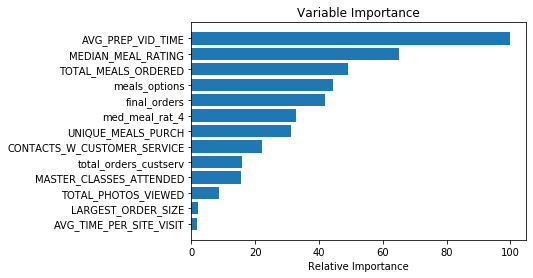

In [22]:
# Plot feature importance
feature_importance = gbt_model.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

#Link: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

As we can see all the variables used to predict the revenue are relevant for the model. The plot indicates that the most important variable is average preparation video time, median meal rating, total meals ordered and the 3 featured variables created before such as: meals option, final orders and med_meal_rat_4. 

# Conclusions

At the beginning of the case I set the goal to perform the analysis addressing the following question:<br>
**How much revenue each customer will generate during their first year of orders?**

Using the Gradient Boosting Model I am able to predict how much revenue each customer will generate during the first year of orders with 80% accuracy on the test set. 

The hypothesis that I stated at the beginning of the analysis helped to drive the analysis towards a clear direction. 

- The first hypothesis wasn't meet since I learned that the average clicks per visit is negatively correlated to the revenue. Also, I discovered that the customers that generate more clicks are the ones producing less revenue. That explain the negative correlation. 

- The second hypothesis stated as: total photos viewed and master class attended indicates the engagement of the customers. It may be related to the engagement of the customers but clearly those two variables improved the prediction of the revenue as we can see in the graph of 'Variable Importance'.

- Last but not least, the average time per site visit at the beginning I thought that the more time spend in the website more probabilities of ordering a new meal would happened. In this case, this variable as we can see in the graph is the least important for our revenue prediction but is still considered as one of the key drivers. 

Overall, some variables were excluded since I tried to optimize as much as possible the prediction of the revenue. At the end 80% of accuracy was met on the test set. 